# CALC Contract Analysis

In [1]:
import pandas

rows = pandas.read_csv('../data/hourly_prices.csv', index_col=False, thousands=',')

## Most popular contracts

In [2]:
rows['Labor Category'].value_counts().head(30).to_frame('Number of contracts')

,Number of contracts
Project Manager,670
Program Manager,586
Subject Matter Expert,248
Consultant,246
Senior Consultant,205
Subject Matter Expert I,192
Subject Matter Expert II,188
Administrative Assistant,184
Project Manager II,175
Project Manager I,169


## Longest labor category names

In [3]:
rows['Labor Category'].str.len().sort_values(ascending=False).\
  to_frame('Labor category length').join(rows).head(5)

,Labor category length,Labor Category,Year 1/base,Year 2,Year 3,Year 4,Year 5,Education,MinExpAct,Bus Size,Location,COMPANY NAME,CONTRACT .,Schedule,SIN NUMBER,Contract Year,Begin Date,End Date,CurrentYearPricing
16,255,"Interpretation Services Class 3: Belorussian, ...",900.0,900.0,900.0,900.0,900.0,NaN,2.0,O,Both,"Transperfect Translations International, Inc.",GS-10F-0076S,Language Services,382-2,1,12/8/2005,12/7/2020,900.0
20183,255,"Interpretation Services Class 3: Belorussian, ...",112.5,112.5,112.5,112.5,112.5,NaN,2.0,O,Both,"Transperfect Translations International, Inc.",GS-10F-0076S,Language Services,382-2,1,12/8/2005,12/7/2020,112.5
16579,255,"Interpretation Services Class 4: Afrikan,Akan,...",124.0,124.0,124.0,124.0,124.0,NaN,2.0,O,Both,"Transperfect Translations International, Inc.",GS-10F-0076S,Language Services,382-2,1,12/8/2005,12/7/2020,124.0
33314,255,Desktop Publishing & Formatting Class 4: Afrik...,80.0,80.0,80.0,80.0,80.0,NaN,2.0,O,Contractor Site,"Transperfect Translations International, Inc.",GS-10F-0076S,Language Services,382-1,1,12/8/2005,12/7/2020,80.0
37933,255,Desktop Publishing & Formatting Class 3: Belor...,70.0,70.0,70.0,70.0,70.0,NaN,2.0,O,Contractor Site,"Transperfect Translations International, Inc.",GS-10F-0076S,Language Services,382-1,1,12/8/2005,12/7/2020,70.0


## Distribution of labor category name lengths

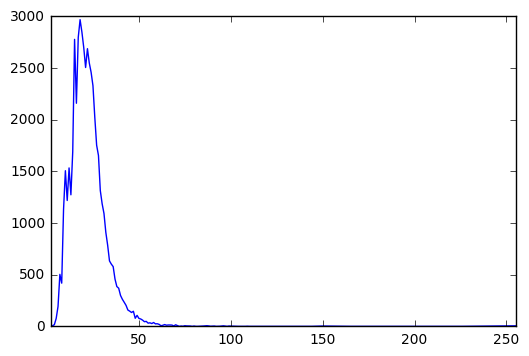

In [4]:
%matplotlib inline

rows['Labor Category'].str.len().value_counts().sort_index().plot()

## Comparable labor categories: roman numerals vs. decimals

I'm trying to answer the question of whether labor categories that end with roman numerals (e.g., `Engineer I`) are synonymous with their decimal counterparts (e.g., `Engineer 1`).

I'm doing this by compaing the mean pricing for year 1 of each pair.

In [5]:
from collections import OrderedDict

SUFFIXES = [
    (' I', ' 1'),
    (' II', ' 2'),
    (' III', ' 3'),
    (' IV', ' 4'),
]

results = []

def get_mean(labor_category):
    return int(rows[rows['Labor Category'] == labor_category]['Year 1/base'].median())

def compare_labor_categories(a, b):
    return abs(get_mean(a) - get_mean(b))

for suffix, alt_suffix in SUFFIXES:
    candidates = rows[rows['Labor Category'].str.endswith(suffix)]['Labor Category'].value_counts()

    for name, count in candidates.head(20).items():
        alternate_name = name[:-len(suffix)] + alt_suffix
        alternate_count = rows[rows['Labor Category'] == alternate_name].shape[0]

        if alternate_count:
            result = OrderedDict()
            result['name'] = name
            result['count'] = count
            result['alternate_name'] = alternate_name
            result['alternate_count'] = alternate_count
            result['total_count'] = count + alternate_count
            result['mean_year_1_delta'] = compare_labor_categories(name, alternate_name)
            results.append(result)

results = pandas.DataFrame(results)

results.sort_values(by=['mean_year_1_delta', 'total_count'], ascending=[True, False])

,name,count,alternate_name,alternate_count,total_count,mean_year_1_delta
6,Technician I,68,Technician 1,24,92,0
55,Engineer/Scientist III,26,Engineer/Scientist 3,2,28,0
21,Project Manager II,175,Project Manager 2,22,197,1
7,Administrative Assistant I,67,Administrative Assistant 1,12,79,1
67,Scientist IV,23,Scientist 4,13,36,1
42,Project Manager III,116,Project Manager 3,15,131,2
45,Consultant III,87,Consultant 3,15,102,2
26,Technician II,71,Technician 2,25,96,2
68,Logistics Analyst IV,23,Logistics Analyst 4,2,25,2
76,Technical Specialist IV,13,Technical Specialist 4,5,18,2


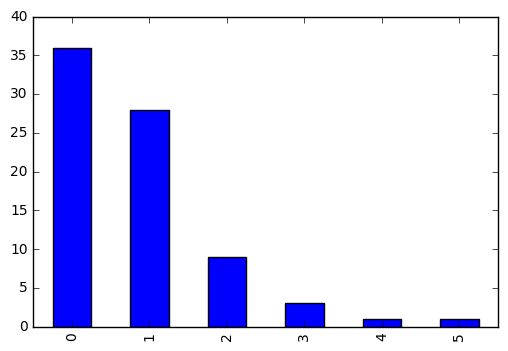

In [6]:
(results['mean_year_1_delta'] / 10).astype(int).value_counts().sort_index().plot(kind='bar')

## Education levels for Engineer I

In [7]:
rows[rows['Labor Category'] == 'Engineer I']['Education'].value_counts()

Bachelors      105
Associates       6
High School      3
Name: Education, dtype: int64

## Median minimum experience for Engineer IV

In [8]:
rows[rows['Labor Category'] == 'Engineer IV']['MinExpAct'].median()

8.0

## Box plot for all year 1 salaries

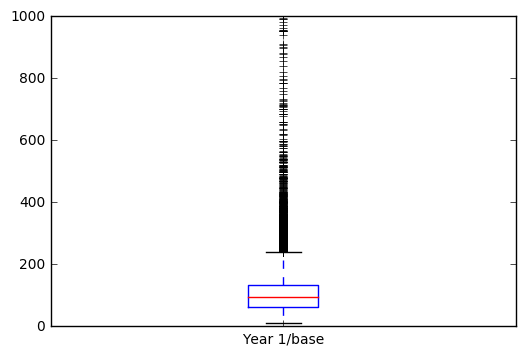

In [9]:
rows['Year 1/base'].plot(kind='box')

## Most popular words in labor categories

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import re

p = PorterStemmer()

token_pattern=re.compile(r"(?u)\b\w\w+\b")

def tokenize(doc):
     return [p.stem(tok) for tok in token_pattern.findall(doc) if len(tok) > 3]


In [11]:
VOCAB_SIZE = 1000

cv = CountVectorizer(max_features=VOCAB_SIZE, stop_words=[], tokenizer=tokenize, binary=True)
word_count = cv.fit_transform(rows['Labor Category'])

In [12]:
from numpy import identity

vocab = cv.get_feature_names()
vocab_counts = {}

for counter, row in enumerate(identity(len(vocab))):
    vocab_counts[vocab[counter]] = word_count.dot(row).sum()

terms = pandas.Series(vocab_counts).to_frame('contracts').sort_values(by='contracts', ascending=False)

def get_rows_with_term(term):
    search_vec = cv.transform([term])
    matches = pandas.Series(word_count.dot(search_vec.toarray()[0]))
    return rows[matches > 0]    

EDUCATION_INTS = {
    'High School': 0,
    'Associates': 1,
    'Bachelors': 2,
    'Masters': 3,
    'Ph.D.': 4,
}

rows['EducationInt'] = rows['Education'].map(lambda edu: EDUCATION_INTS.get(edu))
topterms = terms.head(100).copy()
topterms['mean salary'] = topterms.index.map(lambda t: get_rows_with_term(t)['CurrentYearPricing'].mean()).astype(int)
topterms['stddev salary'] = topterms.index.map(lambda t: get_rows_with_term(t)['CurrentYearPricing'].std()).astype(int)
topterms['mean experience'] = topterms.index.map(lambda t: get_rows_with_term(t)['MinExpAct'].mean()).astype(int)
topterms['stddev experience'] = topterms.index.map(lambda t: get_rows_with_term(t)['MinExpAct'].std()).astype(int)
topterms['mean education'] = topterms.index.map(lambda t: get_rows_with_term(t)['EducationInt'].mean())
topterms['stddev education'] = topterms.index.map(lambda t: get_rows_with_term(t)['EducationInt'].std())

topterms


,contracts,mean salary,stddev salary,mean experience,stddev experience,mean education,stddev education
analyst,7878.0,98,41,6,4,1.815584,0.741265
manag,7749.0,139,64,8,5,2.021163,0.657244
engin,7011.0,111,46,7,5,1.906673,0.671301
specialist,6326.0,95,52,5,4,1.498763,0.937946
senior,5725.0,141,64,9,5,2.043139,0.818094
project,3891.0,124,55,7,4,1.933102,0.725843
consult,3661.0,158,74,8,5,2.176002,0.685469
program,3015.0,142,62,9,5,2.064637,0.703051
technician,2466.0,64,27,4,4,0.605890,0.804386
administr,2386.0,64,35,3,3,0.743908,0.917709


## Finding comparable contracts given labor category, education, and minimum experience

In [13]:
def find_comparable_contracts(search_term, education, min_exp, min_results=30, min_exp_radius=2):
    search_vec = cv.transform([search_term])
    matches = pandas.Series(word_count.dot(search_vec.toarray()[0]))
    matched_rows = pandas.DataFrame()
    for i in range(search_vec.nnz, 0, -1):
        m = rows[matches >= i]
        m = m[m['Education'] == education]
        m = m[m['MinExpAct'] >= min_exp - min_exp_radius]
        m = m[m['MinExpAct'] <= min_exp + min_exp_radius]
        if m.shape[0] >= min_results:
            matched_rows = m
            break
    return matched_rows

matches = find_comparable_contracts(
    search_term='junior Engineer I',
    education='Bachelors',
    min_exp=1
)
matches['CurrentYearPricing'].describe()

count    191.000000
mean      71.852304
std       17.592638
min       31.310000
25%       58.495000
50%       72.080000
75%       82.745000
max      127.380000
Name: CurrentYearPricing, dtype: float64

## Determining whether a price is fair and reasonable

The following algorithm was used as the basis for [CALC PR #997: Add experimental price list analysis](https://github.com/18F/calc/pull/997).

In [14]:
def is_price_fair_and_reasonable(search_term, education, min_exp, price, max_std_dev=2):
    matches = find_comparable_contracts(search_term, education, min_exp)
    num_matches = matches.shape[0]
    if num_matches == 0:
        return None, None, None, None
    pricing = matches['CurrentYearPricing']
    mean = pricing.mean()
    std = pricing.std()
    dist_from_mean = abs(mean - price)
    return dist_from_mean < max_std_dev * std, num_matches, int(mean), int(std)

print(is_price_fair_and_reasonable('administrative assistant', 'High School', 1, 80))
print(is_price_fair_and_reasonable('awesome engineer iii', 'Bachelors', 5, 150))
print(is_price_fair_and_reasonable('hamburger chef', 'High School', 1, 25))

(False, 311, 48, 12)
(True, 2103, 102, 33)
(None, None, None, None)


In [15]:
engis = rows[rows['Labor Category'].str.contains('Software Engineer')]

engis.groupby('COMPANY NAME', as_index=False).median().sort_values(by='CurrentYearPricing', ascending=False)

,COMPANY NAME,Year 1/base,Year 2,Year 3,Year 4,Year 5,MinExpAct,Contract Year,CurrentYearPricing,EducationInt
4,"Antkowiak Design Group, Inc.",211.260,211.260,211.260,211.260,211.260,NaN,1,211.260,2.0
27,"Minerva Engineering, L.l.c.",155.710,158.515,161.370,164.270,167.230,4.0,2,158.515,2.0
20,Insight Systems Corporation,157.570,160.880,164.260,167.710,171.230,8.0,1,157.570,2.0
33,"RadiantBlue Technologies, Inc.",147.555,152.005,156.485,161.135,165.940,8.5,3,156.485,2.0
5,"Applied Defense Solutions, Inc.",126.430,130.350,134.390,138.560,142.850,2.0,5,142.850,2.0
41,"The Kenjya-Trusant Group, LLC",140.090,142.275,144.530,146.850,149.240,10.0,3,140.090,2.0
25,"Mantech Advanced Systems International, Inc.",132.860,135.380,137.950,140.570,143.250,9.0,2,135.380,2.0
6,"Applied Research Associates, Inc.",124.800,128.540,132.400,136.370,140.460,7.0,1,124.800,2.0
45,Utah State University Research Foundation,116.590,119.740,122.970,126.290,129.700,5.0,3,122.970,2.0
18,"Global Science & Technology, Inc.",121.125,124.760,128.500,132.355,136.330,3.5,1,121.125,2.0
